In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Preparing the Data

In [2]:
df = pd.read_csv('weather1.csv')
df

,Temperature,Outlook,Humidity,Windy,Played?
0,Mild,Sunny,80,No,1
1,Hot,Sunny,75,Yes,0
2,Hot,Overcast,77,No,1
3,Cool,Rain,70,No,1
4,Cool,Overcast,72,Yes,1
5,Mild,Sunny,77,No,0
6,Cool,Sunny,70,No,1
7,Mild,Rain,69,No,1
8,Mild,Sunny,65,Yes,1
9,Mild,Overcast,77,Yes,1


In [3]:
df.dtypes

Temperature    object
Outlook        object
Humidity        int64
Windy          object
Played?         int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
Temperature    14 non-null object
Outlook        14 non-null object
Humidity       14 non-null int64
Windy          14 non-null object
Played?        14 non-null int64
dtypes: int64(2), object(3)
memory usage: 688.0+ bytes


In [5]:
df_getdummy= pd.get_dummies(data=df, columns=['Temperature', 'Outlook', 'Windy'])

df_getdummy

,Humidity,Played?,Temperature_Cool,Temperature_Hot,Temperature_Mild,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Windy_No,Windy_Yes
0,80,1,0,0,1,0,0,1,1,0
1,75,0,0,1,0,0,0,1,0,1
2,77,1,0,1,0,1,0,0,1,0
3,70,1,1,0,0,0,1,0,1,0
4,72,1,1,0,0,1,0,0,0,1
5,77,0,0,0,1,0,0,1,1,0
6,70,1,1,0,0,0,0,1,1,0
7,69,1,0,0,1,0,1,0,1,0
8,65,1,0,0,1,0,0,1,0,1
9,77,1,0,0,1,1,0,0,0,1


In [6]:
from sklearn.model_selection import train_test_split

X = df_getdummy.drop('Played?',axis=1)
y = df_getdummy['Played?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Decision Tree Classifier 

In [16]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy',max_depth=4)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
predictions = dtree.predict(X_test)

print(predictions, y_test)

[1 1 1 0 1] 12    0
2     1
3     1
13    1
10    1
Name: Played?, dtype: int64


In [18]:
from sklearn.metrics import classification_report, confusion_matrix

print( confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[0 1]
 [1 3]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      0.75      0.75         4

    accuracy                           0.60         5
   macro avg       0.38      0.38      0.38         5
weighted avg       0.60      0.60      0.60         5



In [19]:
from sklearn.tree import plot_tree

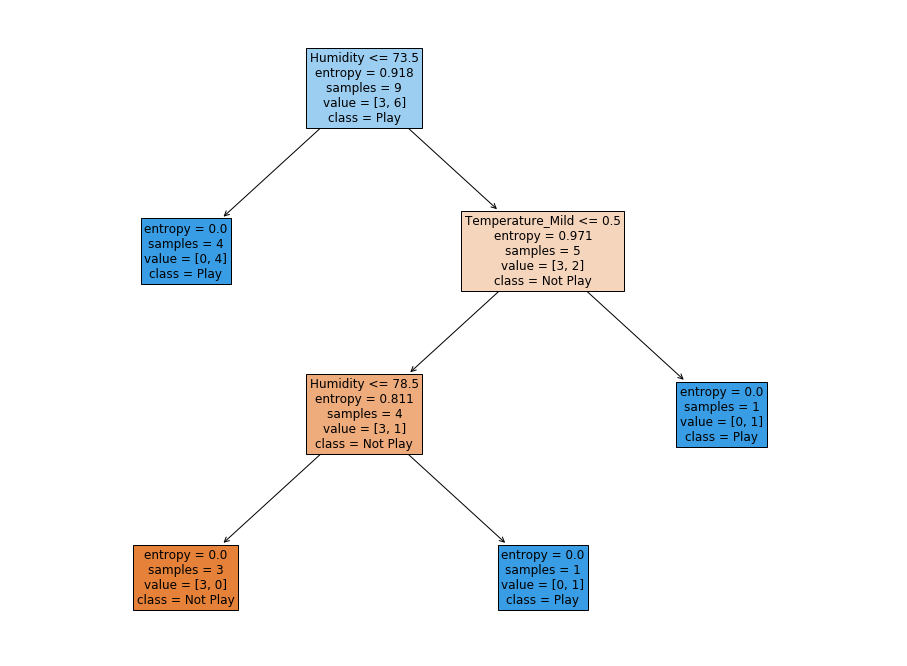

In [20]:
fig = plt.figure(figsize=(16,12))
a = plot_tree(dtree, feature_names=df_getdummy.columns, fontsize=12, filled=True, 
              class_names=['Not Play', 'Play'])

# Decision Tree Regressor

In [12]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=4)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

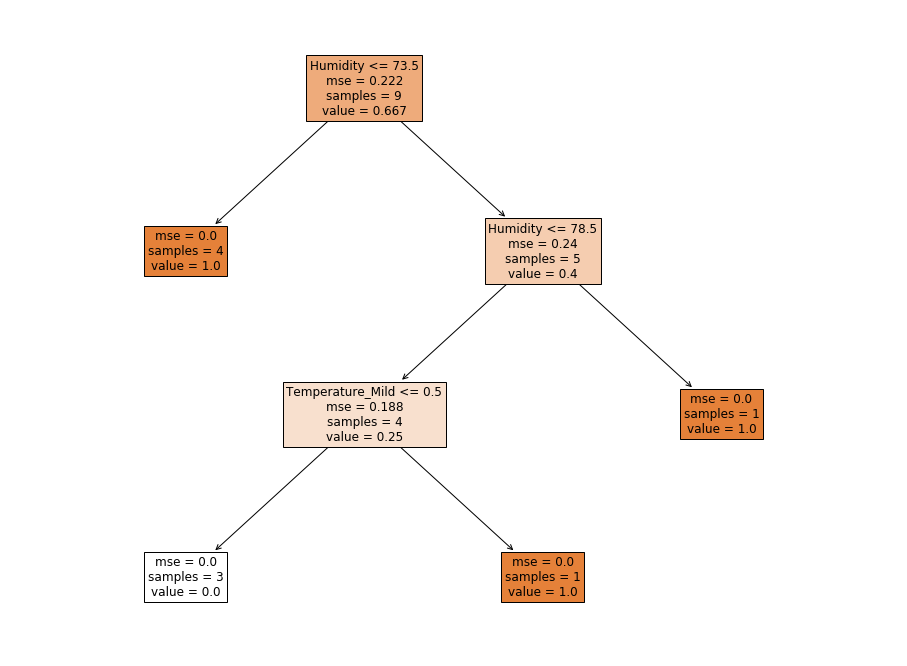

In [13]:
fig = plt.figure(figsize=(16,12))
a = plot_tree(regressor, feature_names=df_getdummy.columns, fontsize=12, filled=True, class_names=['Not Play', 'Play'])

In [23]:
y_pred = regressor.predict(X_test)

print(y_pred, y_test)

[1. 1. 1. 0. 1.] 12    0
2     1
3     1
13    1
10    1
Name: Played?, dtype: int64


In [24]:
from sklearn.metrics import mean_squared_error

mse= mean_squared_error(y_pred,y_test)
rmse = np.sqrt(mse)
rmse

0.6324555320336759